# **THE SPARKS FOUNDATION**

**Name : SWETHA K**

**#GRIPNOVEMBER21**

**Task-2 : Prediction Using Unsupervised ML**

**Problem: Predict the optimum number of clusters and represent it visually**

In [26]:
# Importing all the necessary libraries to work on the dataset
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns

In [31]:
# Reading data from csv dataset as a pandas dataframe
iris_data = pd.read_csv('/content/Iris (1).csv')
print("Iris' data imported successfully")

Iris' data imported successfully


In [32]:
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
# Prints top 5 rows 
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
# Displays a concise summary of the dataframe
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
# Shows some basic statistical details of a dataframe of numeric values.
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
# Checking for nulls and duplicates
print(iris_data.isnull().sum(), '\n\nNumber of duplicate rows:' , iris_data.duplicated().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows: 0


In [37]:
# Checking for unique classes 
print('Number of unique classes:' , iris_data.Species.nunique())
print(iris_data.Species.value_counts())

Number of unique classes: 3
Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


**Visualization of Data**

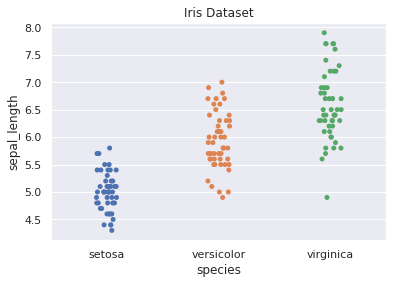

In [38]:
# Using Strip Plot to draw a scatter plot based on the category
sns.set(style = 'darkgrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species', y ='sepal_length', data = iris);
plt.title('Iris Dataset')
plt.show()

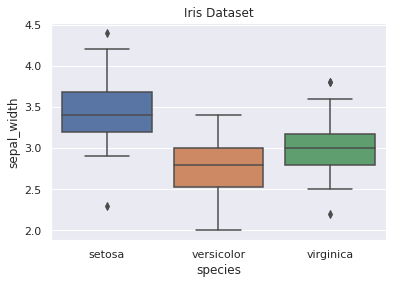

In [39]:
# Using Box Plot to visualize distributions for comparison of data between two groups
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title("Iris Dataset")
plt.show()

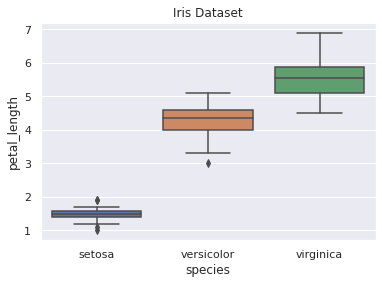

In [40]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title("Iris Dataset")
plt.show()

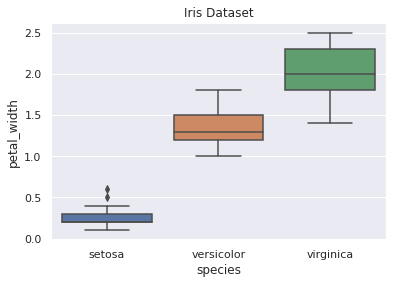

In [41]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title("Iris Dataset")
plt.show()


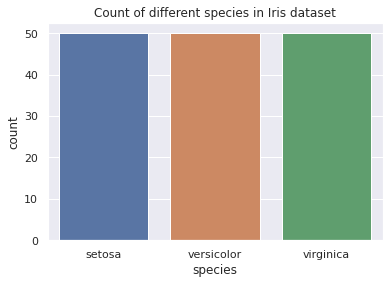

In [42]:
# Using Count Plot to show the counts of observations in each categorical bin using bars.
sns.countplot(x='species', data=iris)
plt.title("Count of different species in Iris dataset")
plt.show()

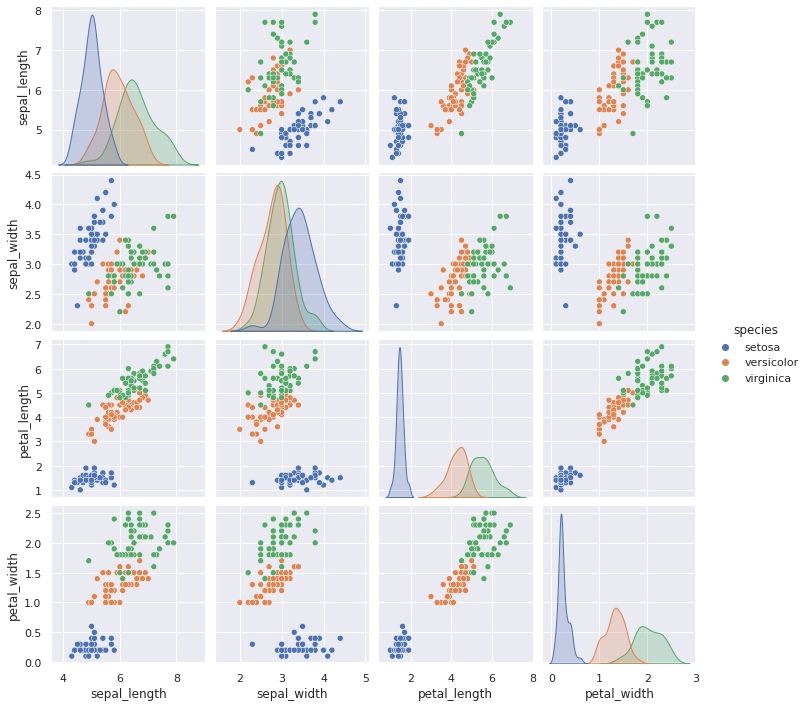

In [43]:
# Using Pair Plot to organize multiple pairwise bivariate distributions 
sns.pairplot(iris, hue='species');


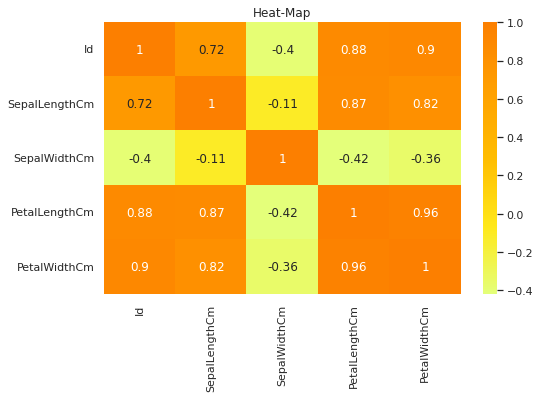

In [44]:
# Using Heat Map to represent various shades of colour for each value to be plotted.
# Darker shades of the chart represent higher values than the lighter shade. 
plt.figure(figsize=(8,5))
sns.heatmap(iris_data.corr(), annot=True, cmap='Wistia')
plt.title("Heat-Map")
plt.show()

#**How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

**K-Means clustering is an unsupervised machine learning algorithm. In contrast to traditional supervised machine learning algorithms, K-Means attempts to classify data without having first been trained with labeled data. It is a clustering method which is used to subdivide the main clusters into smaller number of clusters or sub groups**

In [45]:
# Finding the optimum number of clusters for K-means classification
x = iris_data.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans

# Within-Cluster Sum of Square (WCSS) is the sum of squared distance between each point and the centroid in a cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    
    # Appending the WCSS to the list (kmeans.inertia_ returns the WCSS value for an initialized cluster)
    wcss.append(kmeans.inertia_) 
    print("k=", i, "wcss:", kmeans.inertia_)

k= 1 wcss: 281831.54466666665
k= 2 wcss: 70581.3808
k= 3 wcss: 31320.711199999998
k= 4 wcss: 17762.657226173542
k= 5 wcss: 11423.238080088988
k= 6 wcss: 7909.530673076923
k= 7 wcss: 5881.448116883117
k= 8 wcss: 4562.7800793650795
k= 9 wcss: 3579.72056127451
k= 10 wcss: 2968.491432665374


**Observation: WCSS values of 1 to 10 is shown**

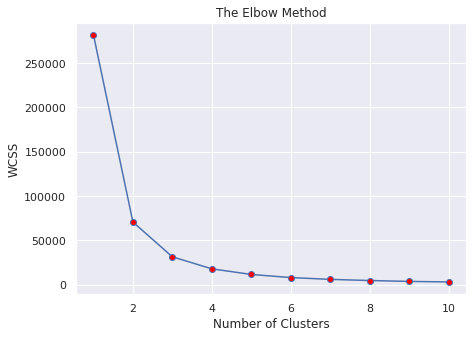

In [46]:
# Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.figure(figsize=(7,5))
plt.plot(range(1,11), wcss, marker='o', markerfacecolor='red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


**Observation: The graph is drastically decreasing from 0 to 4 and we can see that after 3, the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters.

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. From this we choose the number of clusters as "3".**

# **Initializing K-Means With Optimum Number Of Clusters**

In [47]:
# Applying kmeans to the dataset / Creating the kmeans classifier  
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

**Predicting Values**

In [48]:

y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

**Visualizing & Plotting Clusters**

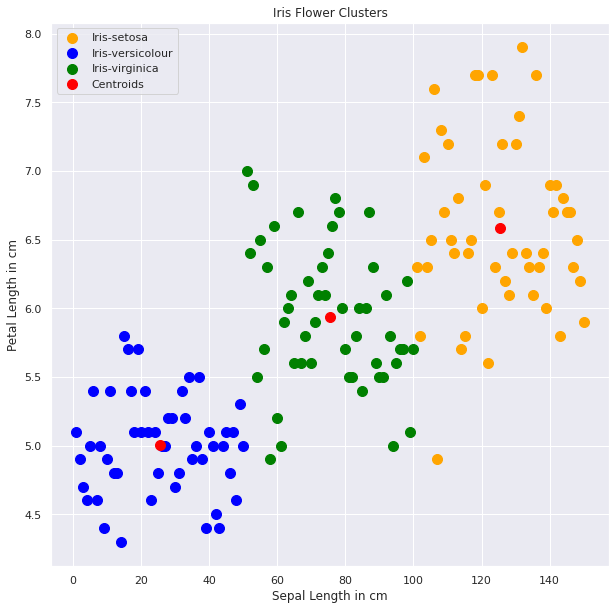

In [49]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()